In [1]:
!pip install -U ultralytics
!yolo version

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.0/888.0 MB 4.6 MB/s  0:03:05 eta 0:00:010:00:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 4.7 MB/s  0:02:03 eta 0:00:010:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 5.1 MB/s  0:00:02 eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 3.8 MB/s  0:00:23 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 3.8 MB/s  0:00:00m 5.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 4.7 MB/s  0:02:28 eta 0:00:010:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 4.8 MB/s  0:00:40 eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 4.9 MB/s  0:00:12 eta 0:00:010:00:01
   ━━━━

In [2]:
from ultralytics import YOLO
import torch
print('CUDA available:', torch.cuda.is_available())

CUDA available: True


In [3]:
# Train YOLOv8 Nano model on your cones dataset
!yolo detect train \
  model=yolov8n.pt \
  data="/home/ravi/Desktop/Traffic Cones.v2-augmentated-version.yolov8/data.yaml" \
  epochs=50 \
  imgsz=640 \
  batch=8 \
  name=cones_yolov8n_experiment

Ultralytics 8.3.203 🚀 Python-3.10.12 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce GTX 1650, 3716MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/ravi/Desktop/Traffic Cones.v2-augmentated-version.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=cones_yolov8n_experiment, nbs=64, nms=False, opset=None, optimize=False, optimize

In [9]:
!yolo task=detect mode=predict \
  model="/home/ravi/Desktop/MFE-Driverless-V1/runs/detect/cones_yolov8n_experiment/weights/best.pt" \
  source="/home/ravi/Desktop/Traffic-Cones-Blog-banner.jpg"

Ultralytics 8.3.203 🚀 Python-3.10.12 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce GTX 1650, 3716MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /home/ravi/Desktop/Traffic-Cones-Blog-banner.jpg: 448x640 2 cones, 46.8ms
Speed: 2.9ms preprocess, 46.8ms inference, 122.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /home/ravi/Desktop/MFE-Driverless-V1/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [1]:
import cv2
from ultralytics import YOLO

# Load model
model = YOLO("/home/ravi/Desktop/MFE-Driverless-V1/runs/detect/cones_yolov8n_experiment/weights/best.pt")

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO prediction on this frame
    results = model(frame)

    # YOLOv8 returns annotated frames
    annotated_frame = results[0].plot()

    # Show result
    cv2.imshow('YOLOv8 Webcam', annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[ WARN:0@1.821] global cap_v4l.cpp:914 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@1.821] global obsensor_uvc_stream_channel.cpp:163 getStreamChannelGroup Camera index out of range


In [1]:
!yolo export model="/home/ravi/Desktop/MFE-Driverless-V1/runs/detect/cones_yolov8n_experiment/weights/best.pt" format=onnx


Ultralytics 8.3.203 🚀 Python-3.10.12 torch-2.8.0+cu128 CPU (AMD Ryzen 7 4800H with Radeon Graphics)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/home/ravi/Desktop/MFE-Driverless-V1/runs/detect/cones_yolov8n_experiment/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.67', 'onnxruntime'] not found, attempting AutoUpdate...
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/18.2 MB ? eta -:--:--
   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/18.2 MB 20.3 MB/s eta 0:00:01
   ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/18.2 MB 15.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/18.2 MB 9.2 MB/s eta 0:00:02
   ━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/18.2 MB 8.8 MB/s eta 0:00:02
   ━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install onnxruntime


Defaulting to user installation because normal site-packages is not writeable


In [5]:
import onnxruntime as ort
import numpy as np
from PIL import Image

# Load your ONNX model
session = ort.InferenceSession('/home/ravi/Desktop/MFE-Driverless-V1/runs/detect/cones_yolov8n_experiment/weights/best.onnx')

# Prepare your input image
img = Image.open('/home/ravi/Desktop/Traffic-Cones-Blog-banner.jpg').resize((640, 640))
img = np.array(img).astype(np.float32) / 255.0  # Normalize to [0, 1]
img = np.transpose(img, (2, 0, 1))[None]        # Shape: (1, 3, 640, 640)

# Run inference
outputs = session.run(None, {'images': img})

# Print raw output shape for inspection
print('ONNX output shape:', [o.shape for o in outputs])


ONNX output shape: [(1, 5, 8400)]


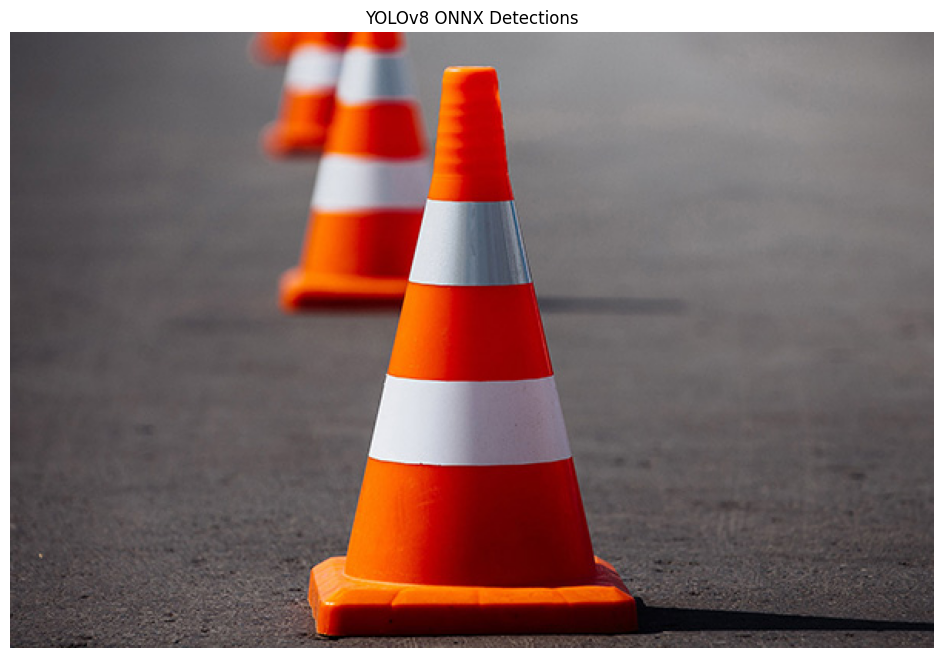

In [6]:
import cv2
import numpy as np
from PIL import Image

# Path to your test image
img_path = '/home/ravi/Desktop/Traffic-Cones-Blog-banner.jpg'

# Load original image (for drawing)
img = cv2.imread(img_path)
img_h, img_w = img.shape[:2]

# --- POST-PROCESSING ---
# outputs[0] shape: (1, 5, 8400)
output = outputs[0][0]  # shape: (5, 8400)
boxes = output[:4, :]   # x, y, w, h
scores = output[4, :]   # confidence

# Confidence threshold
conf_thresh = 0.3
mask = scores > conf_thresh
boxes = boxes[:, mask]
scores = scores[mask]

# Convert [x, y, w, h] to [x1, y1, x2, y2] and rescale to original image size
boxes_xyxy = np.zeros_like(boxes)
boxes_xyxy[0, :] = (boxes[0, :] - boxes[2, :] / 2) * img_w  # x1
boxes_xyxy[1, :] = (boxes[1, :] - boxes[3, :] / 2) * img_h  # y1
boxes_xyxy[2, :] = (boxes[0, :] + boxes[2, :] / 2) * img_w  # x2
boxes_xyxy[3, :] = (boxes[1, :] + boxes[3, :] / 2) * img_h  # y2

# Draw boxes
for i in range(boxes_xyxy.shape[1]):
    x1, y1, x2, y2 = boxes_xyxy[:, i].astype(int)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f'{scores[i]:.2f}', (x1, max(y1-10, 0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

# Show image (in notebook, use matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('YOLOv8 ONNX Detections')
plt.show()


In [7]:
from onnxruntime.quantization import quantize_dynamic, QuantType

# Path to your original ONNX model
model_fp32 = '/home/ravi/Desktop/MFE-Driverless-V1/runs/detect/cones_yolov8n_experiment/weights/best.onnx'
# Path for the quantized model
model_int8 = '/home/ravi/Desktop/MFE-Driverless-V1/runs/detect/cones_yolov8n_experiment/weights/best_int8.onnx'

# Quantize the model (dynamic quantization)
quantize_dynamic(model_fp32, model_int8, weight_type=QuantType.QUInt8)
print('Quantized model saved as:', model_int8)


Quantized model saved as: /home/ravi/Desktop/MFE-Driverless-V1/runs/detect/cones_yolov8n_experiment/weights/best_int8.onnx


In [3]:
import onnxruntime as ort
import numpy as np
from PIL import Image

# Load the quantized ONNX model
session = ort.InferenceSession('/home/ravi/Desktop/MFE-Driverless-V1/runs/detect/cones_yolov8n_experiment/weights/best_int8.onnx')

# Prepare your input image (same as before)
img = Image.open('/home/ravi/Desktop/Traffic-Cones-Blog-banner.jpg').resize((640, 640))
img = np.array(img).astype(np.float32) / 255.0
img = np.transpose(img, (2, 0, 1))[None]

# Run inference
outputs = session.run(None, {'images': img})